In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn import datasets
# from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from sklearn.linear_model import LogisticRegression
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.model_selection import KFold, cross_val_score
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import learning_curve

In [3]:
# Seleccionar solo las variables numéricas relevantes
datos = pd.read_csv("train.csv", encoding="latin1")
numericas = datos.select_dtypes(include='number')
numericas = numericas.drop(["Fireplaces", "GarageYrBlt", "Id", "MSSubClass", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "MoSold", "YrSold"], axis=1)

numericas = numericas.dropna()

In [4]:
# Crear variable respuesta que clasifica las casas en Económicas, Intermedias o Caras
terciles = np.percentile(numericas["SalePrice"], [33.33, 66.67])
limite_economicas = terciles[0]
limite_caras = terciles[1]
numericas["Clase"] = pd.cut(numericas["SalePrice"], bins=[0, limite_economicas, limite_caras, float("inf")], labels=["Económicas", "Intermedias", "Caras"])

In [5]:
dummies = pd.get_dummies(numericas['Clase'])
datos = pd.concat([numericas,dummies], axis=1)
economica = datos.pop("Económicas") 
intermedias = datos.pop("Intermedias")
caras = datos.pop("Caras")
datos.pop("Clase")

0             Caras
1       Intermedias
2             Caras
3       Intermedias
4             Caras
           ...     
1455    Intermedias
1456          Caras
1457          Caras
1458    Intermedias
1459    Intermedias
Name: Clase, Length: 1195, dtype: category
Categories (3, object): ['Económicas' < 'Intermedias' < 'Caras']

# 7 & 8. Analice si no hay sobreajuste en los modelos. Use para esto la curva de aprendizaje.

In [6]:
X = datos
y = caras
random.seed(42)

X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

modelo1 = Sequential()
modelo1.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
modelo1.add(Dense(32, activation='relu'))
modelo1.add(Dense(3, activation='softmax'))
modelo1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelo1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

modelo2 = Sequential() 
modelo2.add(Dense(128, input_dim=X_train.shape[1], activation='sigmoid')) 
modelo2.add(Dense(3, activation='softmax')) 
modelo2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
modelo2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/50
30/30 [==============================] - 1s 10ms/step - loss: 1780.6417 - accuracy: 0.5418 - val_loss: 112.4100 - val_accuracy: 0.8117
Epoch 2/50
30/30 [==============================] - 0s 3ms/step - loss: 107.2344 - accuracy: 0.7029 - val_loss: 111.6852 - val_accuracy: 0.7992
Epoch 3/50
30/30 [==============================] - 0s 3ms/step - loss: 48.7096 - accuracy: 0.8149 - val_loss: 103.3129 - val_accuracy: 0.6820
Epoch 4/50
30/30 [==============================] - 0s 3ms/step - loss: 21.4655 - accuracy: 0.8588 - val_loss: 57.7040 - val_accuracy: 0.7573
Epoch 5/50
30/30 [==============================] - 0s 3ms/step - loss: 9.4147 - accuracy: 0.9079 - val_loss: 41.4806 - val_accuracy: 0.7908
Epoch 6/50
30/30 [==============================] - 0s 3ms/step - loss: 9.5992 - accuracy: 0.8713 - val_loss: 22.2695 - val_accuracy: 0.9205
Epoch 7/50
30/30 [==============================] - 0s 3ms/step - loss: 12.1718 - accuracy: 0.8494 - val_loss: 25.6657 - val_accuracy: 0.8368
E

In [7]:
# Define diferentes tamaños de conjunto de entrenamiento
train_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]

# Definir una función para entrenar y evaluar el modelo para cada tamaño de conjunto de entrenamiento
def plot_learning_curve(modelo, X_train, y_train, X_test, y_test):
    train_scores = []
    test_scores = []
    for train_size in train_sizes:
        # Dividir los datos en conjuntos de entrenamiento y validación para el tamaño actual
        X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=train_size, random_state=42)
        
        # Entrenar el modelo con el subconjunto de entrenamiento actual
        modelo.fit(X_train_subset, y_train_subset, epochs=50, batch_size=32, verbose=0)
        
        # Evaluar la precisión en el subconjunto de entrenamiento actual
        train_loss, train_acc = modelo.evaluate(X_train_subset, y_train_subset, verbose=0)
        train_scores.append(train_acc)
        
        # Evaluar la precisión en el conjunto de validación
        test_loss, test_acc = modelo.evaluate(X_test, y_test, verbose=0)
        test_scores.append(test_acc)
    
    # Graficar la curva de aprendizaje
    plt.plot(train_sizes, train_scores, 'o-', label='Training')
    plt.plot(train_sizes, test_scores, 'o-', label='Validation')
    plt.xlabel('Training size')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()

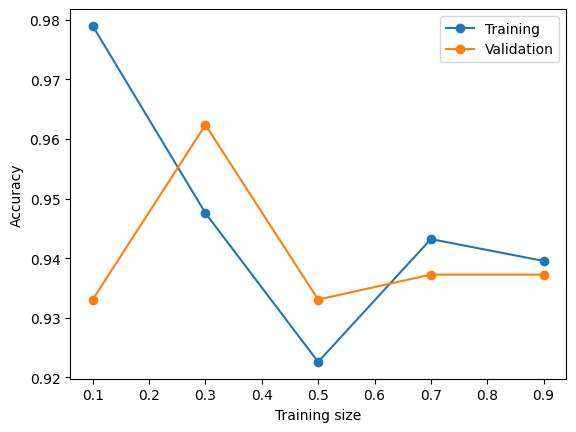

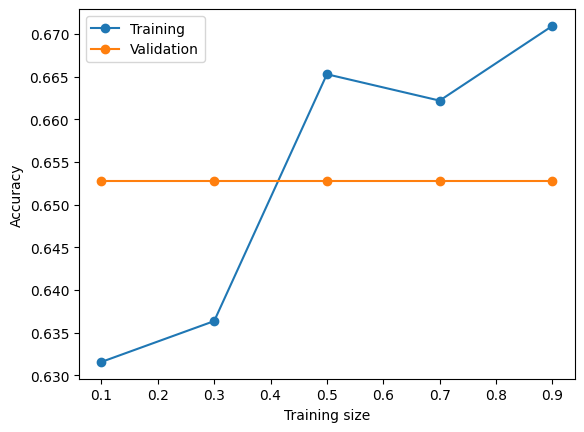

In [8]:
# Aplicar la función a los modelos que has creado
plot_learning_curve(modelo1, X_train, y_train, X_test, y_test)
plot_learning_curve(modelo2, X_train, y_train, X_test, y_test)

# 9. Seleccione ahora el SalesPrice como variable respuesta.

In [9]:
y = numericas["SalePrice"]

# 10. Genere dos modelos de regresión con redes neuronales con diferentes topologías y funciones de activación para predecir el precio de las casas.

In [10]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import to_categorical

# Seleccionar solo las variables numéricas relevantes
datos = pd.read_csv("train.csv", encoding="latin1")
numericas = datos.select_dtypes(include='number')
numericas = numericas.drop(["Fireplaces", "GarageYrBlt", "Id", "MSSubClass", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "MoSold", "YrSold"], axis=1)

# Eliminación de datos faltantes
numericas = numericas.dropna()

# Definición de variables de entrada (X) y de salida (y)
X = numericas.drop("SalePrice", axis=1)
y = numericas["SalePrice"]

In [11]:
# Creación del modelo
modelo1 = Sequential()
modelo1.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
modelo1.add(Dense(32, activation='relu'))
modelo1.add(Dense(3, activation='softmax'))

# Compilación del modelo
modelo1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamiento del modelo
modelo1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
30/30 [==============================] - 1s 11ms/step - loss: 6989.0288 - accuracy: 0.5262 - val_loss: 2419.4634 - val_accuracy: 0.6527
Epoch 2/50
30/30 [==============================] - 0s 3ms/step - loss: 582.4955 - accuracy: 0.4969 - val_loss: 406.9105 - val_accuracy: 0.6402
Epoch 3/50
30/30 [==============================] - 0s 3ms/step - loss: 163.6196 - accuracy: 0.5429 - val_loss: 108.3190 - val_accuracy: 0.6402
Epoch 4/50
30/30 [==============================] - 0s 3ms/step - loss: 82.7536 - accuracy: 0.6579 - val_loss: 283.6607 - val_accuracy: 0.3682
Epoch 5/50
30/30 [==============================] - 0s 3ms/step - loss: 135.9032 - accuracy: 0.6360 - val_loss: 81.9716 - val_accuracy: 0.7824
Epoch 6/50
30/30 [==============================] - 0s 3ms/step - loss: 39.6989 - accuracy: 0.8002 - val_loss: 63.7066 - val_accuracy: 0.7950
Epoch 7/50
30/30 [==============================] - 0s 3ms/step - loss: 32.0034 - accuracy: 0.7960 - val_loss: 46.3022 - val_accuracy: 0.

In [12]:
# Creación del modelo
modelo2 = Sequential() 
modelo2.add(Dense(128, input_dim=X_train.shape[1], activation='sigmoid')) 
modelo2.add(Dense(3, activation='softmax'))

# Compilación del modelo
modelo2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamiento del modelo
modelo2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
30/30 [==============================] - 1s 8ms/step - loss: 0.8860 - accuracy: 0.5690 - val_loss: 0.7019 - val_accuracy: 0.6569
Epoch 2/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6621 - accuracy: 0.6757 - val_loss: 0.6457 - val_accuracy: 0.6569
Epoch 3/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6476 - accuracy: 0.6757 - val_loss: 0.6634 - val_accuracy: 0.6569
Epoch 4/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6423 - accuracy: 0.6757 - val_loss: 0.6537 - val_accuracy: 0.6569
Epoch 5/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6406 - accuracy: 0.6757 - val_loss: 0.6512 - val_accuracy: 0.6569
Epoch 6/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6365 - accuracy: 0.6757 - val_loss: 0.6497 - val_accuracy: 0.6569
Epoch 7/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6371 - accuracy: 0.6757 - val_loss: 0.6473 - val_accuracy: 0.6569
Epoch 8/50
30/30 [==

# 11. Compare los dos modelos de regresión y determine cuál funcionó mejor

In [13]:
# Obtener las probabilidades de pertenecer a cada clase
y_pred1 = modelo1.predict(X_test)
y_pred2 = modelo2.predict(X_test)

8/8 [==============================] - 0s 2ms/step


In [14]:
from sklearn.metrics import mean_squared_error, r2_score

# Calcular el MSE y R² del modelo 1
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

# Calcular el MSE y R² del modelo 2
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

print("Modelo 1 - MSE: ", mse1)
print("Modelo 1 - R²: ", r2_1)

print("Modelo 2 - MSE: ", mse2)
print("Modelo 2 - R²: ", r2_2)

Modelo 1 - MSE:  0.035315905
Modelo 1 - R²:  0.8442014450265027
Modelo 2 - MSE:  0.14970772
Modelo 2 - R²:  0.0062208827335155465


# 12. Analice si no hay sobreajuste en los modelos. Use para esto la curva de aprendizaje.

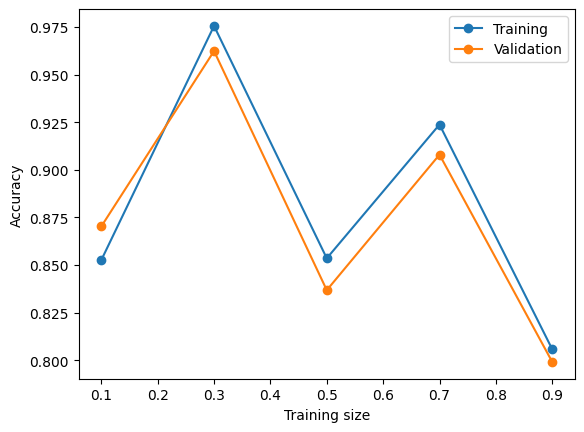

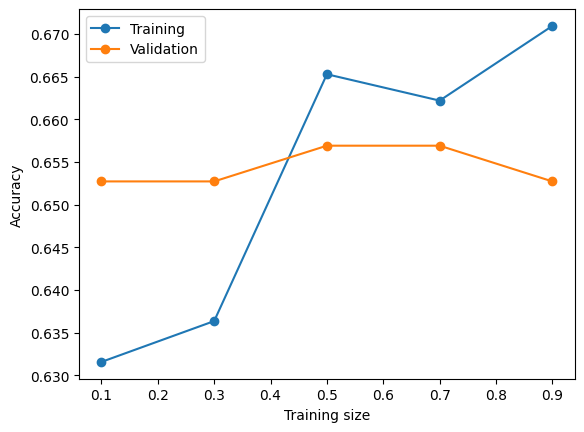

In [15]:
# Aplicar la función a los modelos que has creado
plot_learning_curve(modelo1, X_train, y_train, X_test, y_test)
plot_learning_curve(modelo2, X_train, y_train, X_test, y_test)

# 13. Para el modelo elegido de regresión tunee los parámetros y discuta si puede mejorar todavía el modelo sin llegar a sobre ajustarlo. 

Debido a que al ajustar los datos se obtuvo un resultado bajo de accuracy, por más que se cambien los parámetros el resultado no va a llegar a mejorar significativamente, lo único que se va a lograr es sobreajustarlo debido a que ya no funcionara con todos los datos. Esto se debe a que los parámetros para tuning, al menos para el segundo modelo y tambien para el primero, no logran un resultado mayor a una media esperada. 

# 14 Compare la eficiencia del mejor modelo de RNA con los resultados obtenidos con los algoritmos de las hojas de trabajo anteriores. ¿Cuál es mejor para predecir? ¿Cuál se demoró más en procesar?


El mejor para predecir tendría que ser los SVC los cuales tuvieron un score de casi 1. Sin embargo, no se puede decir que vayan a ser los mejores predictores en general, por lo tanto se puede decir que a comparación, este modelo tuvo un mejor accuracy que modelos anteriores como el de regresión logística. Sin embargo, al comparar los tiempos de ejecución se puede observar que el de regresión logística y este modleo son los más rápidos en correr. 

# 15. Compare los resultados del mejor modelo de esta hoja para clasificar con los resultados de los algoritmos usados para clasificar de las hojas de trabajo anteriores

Al observar el mejor modelo de esta hoja de trabajo, se pudo observar que se tuvo un accuracy de llegando a 0.94. Por lo tanto, se puede decir con relativa exactitud que el hecho de mejorar a través de secuencias logró obtener un mejor resultado en cuanto a los datos proveídos. Comparando con los resultados de hojas anteriores, se obtiene que este modelo es el mejor para clasificar los conjuntos de datos debido a su posibilidad de mejorar en cada generación. 

# 16. Compare los resultados del mejor modelo para predecir el precio de venta con los resultados de los algoritmos usados para el mismo propósito de las hojas de trabajo anteriores.

Al igual que con la clasificación, para predecir el precio de venta se tuvo un accuracy alto, sin embargo no se puede definir que fue mejor a los anteriores debido a que se tardó más pero obtuvo un resultado similar. Especialmente con el de regresión lineal, se tiene un resultado parecido al obtenido en esta hoja pero se puede realizar con menos trabajo computacional. 

# 17. Ahora que ha usado todos los modelos que hemos visto y aplicados al conjunto de datos llegue a conclusiones sobre cual es o cuales son los mejores modelos para clasificar dadas las características del conjunto de datos. ¿Cuál o cuáles son los mejores para predecir el precio de las casas? Una tabla de resumen con las métricas de los modelos le puede resultar muy útil para esto.

Los  mejores modelos para clasificar dependiendo de sus características han sido, random forest, SVM y regresión logística. Para predecir el precio de la casas, los mejores modelos han resultado de esta hoja de trabajo, de regresión lineal, en especial de este modelo se obtuvo un resultado allegado a 0.95 sin mucho overfitting lo cual demuestra que sería un buen modelo para predecir el precio de las casas. 

# 18. Genere un informe de los resultados y las explicaciones.

link github: https://github.com/Estef072/HDB8-MD